# Include Chirp In Training

In [1]:
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, cbar = False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if cbar == True:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
model = keras.models.load_model("/Volumes/KleeFD/models/Chirp/train with chirp-one model one output _ re-preprocessed data.h5")

In [5]:
# model = keras.models.load_model("/Volumes/KleeFD/models/Testing effect of window size/one thirds/iter 1.h5")

In [6]:
categories = []

boa_cat = [25.0]*8 + [30.0]*8
freq_cat = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

for b, f in zip(boa_cat, freq_cat):
    categories.append((str(b) + ', '+ str(f)))

In [7]:
dir = "/Volumes/KleeFD/dataset/dataset_chirp/04_sinusoidal + chirp _repreprocessed"

In [8]:
test_X = np.load(dir + '/test_X.npy')
test_Y = np.load(dir + '/test_Y.npy')

chirp = np.where(test_Y[:,2] == 'chirp')[0]
sin = np.where(test_Y[:,2] == 'sin')[0]

chirp.shape, sin.shape

((270,), (1682,))

In [9]:
1682/270

6.229629629629629

In [8]:
chirp_Y = test_Y[chirp]
sin_Y = test_Y[sin]

chirp_X = test_X[chirp]
sin_X = test_X[sin]

In [9]:
Y = np.zeros((len(chirp_Y), 1), dtype = '<U10')
for i in range(len(chirp_Y)):
    Y[i] = (str(chirp_Y[i,0])+', '+ str(chirp_Y[i, 1]))
chirp_Y = Y

# Chirp Evaluation

In [10]:
pred_proba = model.predict(chirp_X)

9/9 [==============================] - 1s 40ms/step


In [11]:
pred_idx = np.argmax(pred_proba, axis = 1)
pred = []

for p in pred_idx:
    pred.append(categories[p])

print(classification_report(chirp_Y, pred))

              precision    recall  f1-score   support

  25.0, 0.05       1.00      0.86      0.92         7
   25.0, 0.1       0.96      1.00      0.98        22
   25.0, 0.2       1.00      1.00      1.00        23
  25.0, 0.25       1.00      0.73      0.85        15
   25.0, 0.3       0.78      0.93      0.85        15
  25.0, 0.35       0.87      0.87      0.87        15
   25.0, 0.4       0.92      0.96      0.94        23
   25.0, 0.5       0.94      1.00      0.97        15
  30.0, 0.05       0.39      1.00      0.56         7
   30.0, 0.1       1.00      0.45      0.62        22
   30.0, 0.2       1.00      1.00      1.00        23
  30.0, 0.25       1.00      1.00      1.00        15
   30.0, 0.3       1.00      0.60      0.75        15
  30.0, 0.35       1.00      0.07      0.12        15
   30.0, 0.4       0.41      0.52      0.46        23
   30.0, 0.5       0.28      0.53      0.36        15

    accuracy                           0.78       270
   macro avg       0.85   

Confusion matrix, without normalization


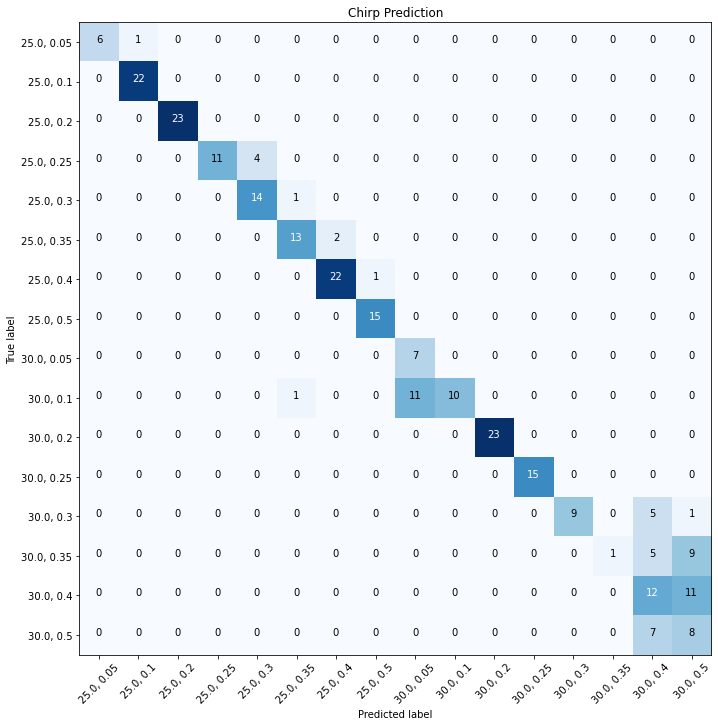

In [12]:
cnf_matrix = confusion_matrix(chirp_Y, pred)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes = categories, normalize=False,
                      title='Chirp Prediction')
plt.show()

# In depth investigation for chirp

1. check for freq - boa separately
1. check instantaneous angle of attack & frequency for incorrect cases

In [13]:
boa_pred = []; freq_pred = []
for p in pred:
    boa_pred.append(p.split(', ')[0])
    freq_pred.append(p.split(', ')[1])

boa_pred = np.array(boa_pred); freq_pred = np.array(freq_pred)

In [14]:
boa = []; freq = []
for p in chirp_Y[:,:2]:
    p = p[0]
    boa.append(p.split(', ')[0])
    freq.append(p.split(', ')[1])

boa = np.array(boa); freq = np.array(freq)

In [15]:
print("BoA")
print(classification_report(boa, boa_pred))
print('='*50)
print("freq")
print(classification_report(freq, freq_pred))

BoA
              precision    recall  f1-score   support

        25.0       0.99      1.00      1.00       135
        30.0       1.00      0.99      1.00       135

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

freq
              precision    recall  f1-score   support

        0.05       0.54      0.93      0.68        14
         0.1       0.97      0.73      0.83        44
         0.2       1.00      1.00      1.00        46
        0.25       1.00      0.87      0.93        30
         0.3       0.85      0.77      0.81        30
        0.35       0.88      0.47      0.61        30
         0.4       0.64      0.74      0.69        46
         0.5       0.51      0.77      0.61        30

    accuracy                           0.78       270
   macro avg       0.80      0.78      0.77       270
weighted avg       0.83      0.78      0.79       270



Confusion matrix, without normalization


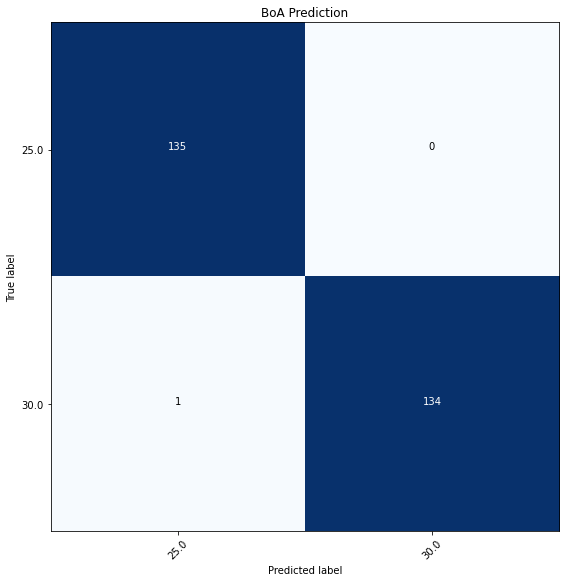

Confusion matrix, without normalization


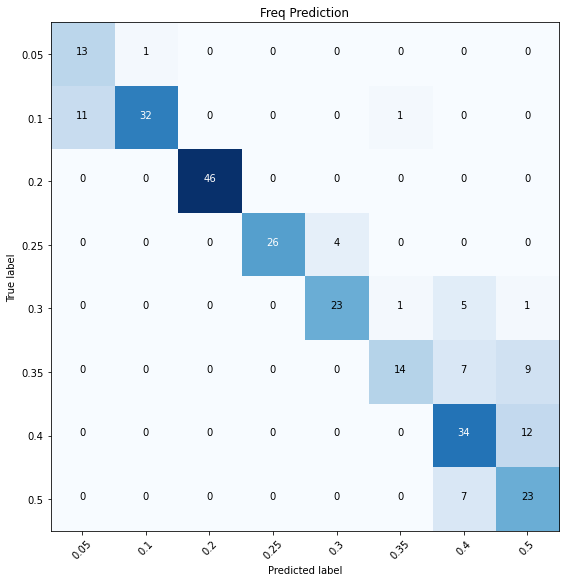

In [16]:
cnf_matrix1 = confusion_matrix(boa, boa_pred)
cnf_matrix2 = confusion_matrix(freq, freq_pred)

plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix1, classes = ['25.0', '30.0'], normalize=False,
                      title='BoA Prediction')
plt.show()

plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix2, classes = [str(f) for f in freq_cat[0:8]], normalize=False,
                      title='Freq Prediction')
plt.show()

## checking instantaneous angle & frequency for incorrect cases

In [17]:
chirp_Y = test_Y[chirp]
sin_Y = test_Y[sin]

chirp_X = test_X[chirp]
sin_X = test_X[sin]

In [18]:
data = {}
for cat in freq_cat[0:8]:
    print("frequency :", cat)
    f_indices = np.where(freq == str(cat))[0].reshape(-1)

    wrong_indices = []
    for idx in f_indices:
        if freq_pred[idx] != freq[idx]:
            wrong_indices.append(idx)
    wrong_indices = np.array(wrong_indices).reshape(-1)
    data[float(cat)] = wrong_indices
    
    for wi in wrong_indices:
        print("freq_pred : {:.2f}, inst_angle : {:.3f}, inst_freq : {:.3f}".format(float(freq_pred[wi]),float(chirp_Y[wi][3]), float(chirp_Y[wi][4])))
    print("=" * 40)

frequency : 0.05
freq_pred : 0.10, inst_angle : 28.045, inst_freq : 0.074
frequency : 0.1
freq_pred : 0.05, inst_angle : 26.030, inst_freq : 0.096
freq_pred : 0.05, inst_angle : 34.940, inst_freq : 0.114
freq_pred : 0.05, inst_angle : 34.945, inst_freq : 0.082
freq_pred : 0.05, inst_angle : 33.125, inst_freq : 0.087
freq_pred : 0.05, inst_angle : 31.586, inst_freq : 0.109
freq_pred : 0.05, inst_angle : 26.752, inst_freq : 0.104
freq_pred : 0.05, inst_angle : 35.000, inst_freq : 0.081
freq_pred : 0.05, inst_angle : 28.502, inst_freq : 0.093
freq_pred : 0.05, inst_angle : 34.787, inst_freq : 0.083
freq_pred : 0.35, inst_angle : 25.096, inst_freq : 0.099
freq_pred : 0.05, inst_angle : 34.985, inst_freq : 0.081
freq_pred : 0.05, inst_angle : 34.778, inst_freq : 0.116
frequency : 0.2
frequency : 0.25
freq_pred : 0.30, inst_angle : 24.078, inst_freq : 0.273
freq_pred : 0.30, inst_angle : 25.634, inst_freq : 0.274
freq_pred : 0.30, inst_angle : 28.423, inst_freq : 0.275
freq_pred : 0.30, inst

In [19]:
data # contains wrong indices

{0.05: array([124]),
 0.1: array([135, 158, 164, 165, 177, 186, 199, 213, 216, 227, 241, 249]),
 0.2: array([], dtype=float64),
 0.25: array([  7,  60,  67, 125]),
 0.3: array([ 89, 144, 193, 198, 223, 224, 263]),
 0.35: array([ 50,  61, 148, 160, 168, 172, 185, 196, 197, 220, 229, 231, 239,
        240, 254, 269]),
 0.4: array([ 32, 139, 140, 145, 149, 162, 166, 189, 208, 222, 225, 232]),
 0.5: array([151, 155, 173, 184, 243, 255, 264])}

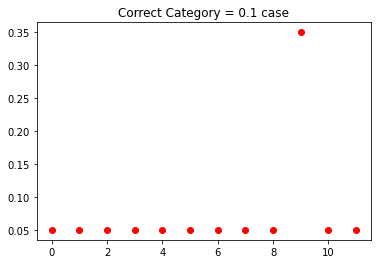

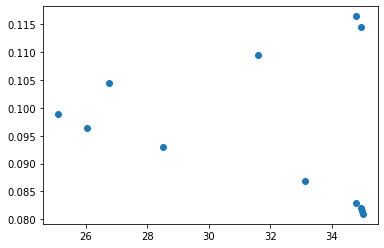

In [20]:
# print("prediction : {:.2f}, inst_angle : {:.3f}, inst_freq : {:.3f}".format(float(pred05[wi]),float(chirp_Y[wi][3]), float(chirp_Y[wi][4])))

# 0.1 case
f = 0.1

prediction = freq_pred[data[f]].astype('float32')
inst_angle = chirp_Y[data[f], 3].astype('float64')
inst_freq = chirp_Y[data[f], 4].astype('float64')

boa = chirp_Y[data[f], 0].astype('float32')

plt.title("Correct Category = " + str(f) + " case")
x = np.arange(len(prediction))
plt.scatter(x,prediction, label = 'predicted frequency', c = 'r')
for i in range(len(boa)):
    if boa[i] == 25.0:
        plt.scatter(x[i], prediction[i], c = 'blue')
plt.show()

# plt.scatter(x, inst_angle)
# plt.show()

# plt.scatter(x, inst_freq)
# plt.show()

plt.scatter(inst_angle, inst_freq)

# There might be some kind of relationship...



# Sinusoidal Evaluation

In [21]:
pred_proba = model.predict(sin_X)

53/53 [==============================] - 2s 39ms/step


In [22]:
Y = np.zeros((len(sin_Y), 1), dtype = '<U10')
for i in range(len(sin_Y)):
    Y[i] = (str(sin_Y[i,0])+', '+ str(sin_Y[i, 1]))
sin_Y = Y

In [23]:
pred_idx = np.argmax(pred_proba, axis = 1)
pred = []

for p in pred_idx:
    pred.append(categories[p])

print(classification_report(sin_Y, pred))

              precision    recall  f1-score   support

  25.0, 0.05       1.00      0.68      0.81        60
   25.0, 0.1       0.76      1.00      0.86        60
   25.0, 0.2       0.98      1.00      0.99        60
  25.0, 0.25       1.00      1.00      1.00        60
   25.0, 0.3       1.00      1.00      1.00        60
  25.0, 0.35       1.00      1.00      1.00        60
   25.0, 0.4       0.00      0.00      0.00        60
   25.0, 0.5       0.21      0.27      0.24        60
  30.0, 0.05       0.99      0.97      0.98       151
   30.0, 0.1       0.99      0.99      0.99       150
   30.0, 0.2       0.99      1.00      1.00       151
  30.0, 0.25       1.00      1.00      1.00       150
   30.0, 0.3       1.00      1.00      1.00       150
  30.0, 0.35       1.00      0.99      0.99       150
   30.0, 0.4       0.99      1.00      0.99       150
   30.0, 0.5       1.00      1.00      1.00       150

    accuracy                           0.92      1682
   macro avg       0.87   

Confusion matrix, without normalization


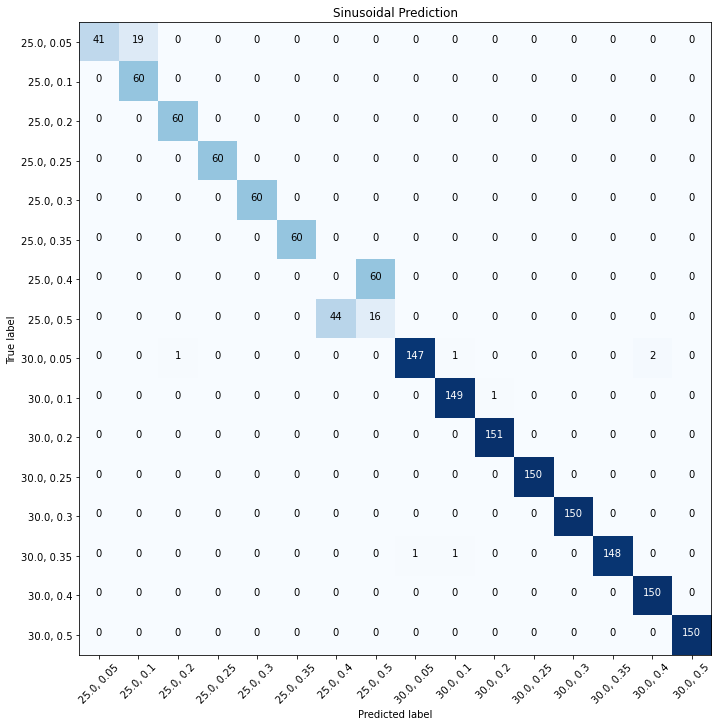

In [24]:
cnf_matrix = confusion_matrix(sin_Y, pred)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes = categories, normalize=False,
                      title='Sinusoidal Prediction')
plt.show()